In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')

In [3]:
display(df)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-11-29,29,11,2020,228,11,Afghanistan,AF,AFG,38041757.0,Asia,6.845110
1,2020-11-28,28,11,2020,214,15,Afghanistan,AF,AFG,38041757.0,Asia,6.784650
2,2020-11-27,27,11,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,6.395604
3,2020-11-26,26,11,2020,200,12,Afghanistan,AF,AFG,38041757.0,Asia,7.341932
4,2020-11-25,25,11,2020,185,13,Afghanistan,AF,AFG,38041757.0,Asia,7.199983
...,...,...,...,...,...,...,...,...,...,...,...,...
58685,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
58686,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
58687,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
58688,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [8]:
select = df['countriesAndTerritories']=='Iran'
df_IR = df.loc[select,:]
df_IR

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
26027,2020-11-29,29,11,2020,13402,391,Iran,IR,IRN,82913893.0,Asia,224.659575
26028,2020-11-28,28,11,2020,14051,406,Iran,IR,IRN,82913893.0,Asia,222.007426
26029,2020-11-27,27,11,2020,13961,482,Iran,IR,IRN,82913893.0,Asia,219.216579
26030,2020-11-26,26,11,2020,27564,952,Iran,IR,IRN,82913893.0,Asia,216.268943
26031,2020-11-25,25,11,2020,0,0,Iran,IR,IRN,82913893.0,Asia,197.232326
...,...,...,...,...,...,...,...,...,...,...,...,...
26357,2020-01-04,4,1,2020,0,0,Iran,IR,IRN,82913893.0,Asia,NaN
26358,2020-01-03,3,1,2020,0,0,Iran,IR,IRN,82913893.0,Asia,NaN
26359,2020-01-02,2,1,2020,0,0,Iran,IR,IRN,82913893.0,Asia,NaN
26360,2020-01-01,1,1,2020,0,0,Iran,IR,IRN,82913893.0,Asia,NaN


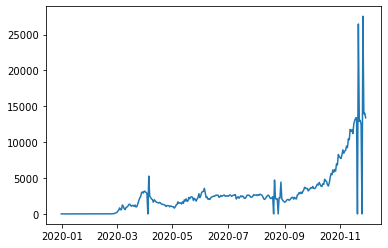

In [9]:
df_IR = df_IR.sort_values(by='dateRep').set_index('dateRep')
plt.plot(df_IR['cases'])

# Outliers

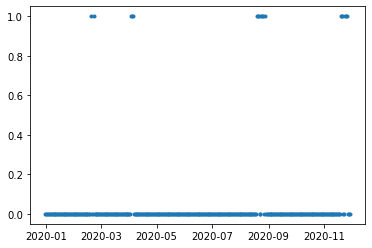

In [37]:
df_IR['expected_cases'] = (df_IR.loc[:,'cases'].shift(-1)+df_IR.loc[:,'cases'].shift(1))/2
isoutlier = (np.abs((df_IR.expected_cases-df_IR.cases)/df_IR.expected_cases))>0.7
plt.plot(isoutlier,'.')

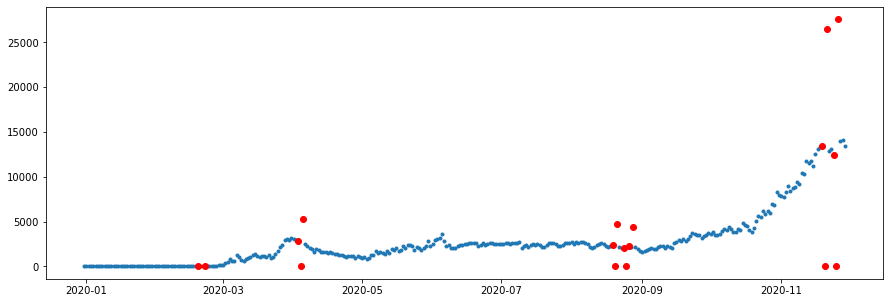

In [38]:
# نمایش outliers
plt.figure(figsize=(15,5))
plt.plot(df_IR.cases,'.')
plt.plot(df_IR.loc[isoutlier,'cases'],'ro')

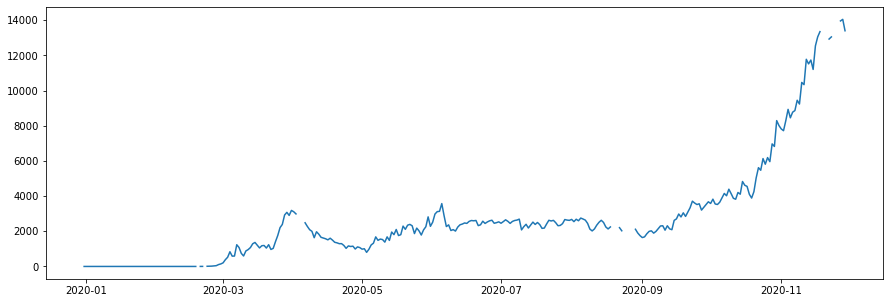

In [45]:
df_IR.loc[isoutlier,'cases']=np.nan
plt.figure(figsize=(15,5))
plt.plot(df_IR.cases)
df_IR.cases = df_IR.cases.interpolate(method='linear')

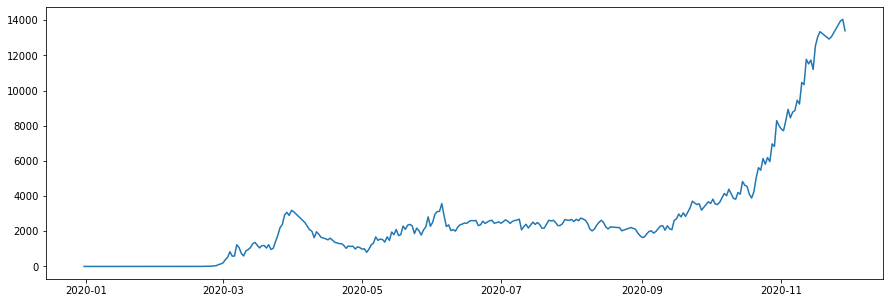

In [43]:
plt.figure(figsize=(15,5))
plt.plot(df_IR.cases,'-')